In [1]:
from torchvision import transforms, models
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pickle
import faiss
import torch

In [2]:
# img_paths used below with FAISS code
with open('resources/vegImgs_img_paths.pickle', 'rb') as f:  img_paths = pickle.load(f)
with open('resources/vegImgs_features.pickle', 'rb') as f:  features = pickle.load(f)

In [7]:
# Model
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using Deivce:", DEVICE)
model = models.resnet50(pretrained=True)
model.to(DEVICE)

# Helper fxn
def pooling_output(x):
    global model
    for layer_name, layer in model._modules.items():
        x = layer(x)
        if layer_name == 'avgpool':
            break
    return x

# Image Transform (preprocessing)
transform = transforms.Compose([
    transforms.Resize(size=[224, 224], interpolation=2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
])


dimension = 2048

# index = faiss.IndexFlatIP(2048)
# index.add(features)

# Add trained features to FAISS index
index = faiss.IndexFlatL2(dimension) 
index.add(features)

# print(type(index))

# print(index.__sizeof__(), "bytes")
# print(features.__sizeof__(), "bytes")

Using Deivce: cuda


/home/umar-musashi/venv/torchgpu/lib/python3.8/site-packages/torchvision/transforms/transforms.py:287: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


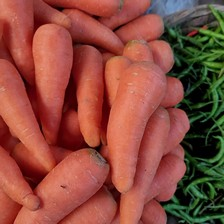

In [5]:
query_image = '/home/umar-musashi/Downloads/Vegetable Images/test/Carrot/1002.jpg'

# query_image = test_img_paths[1][0]
# print(query_image)
# print(classname(query_image))
PIL_img = Image.open(query_image)
PIL_img = PIL_img.convert('RGB')
PIL_img

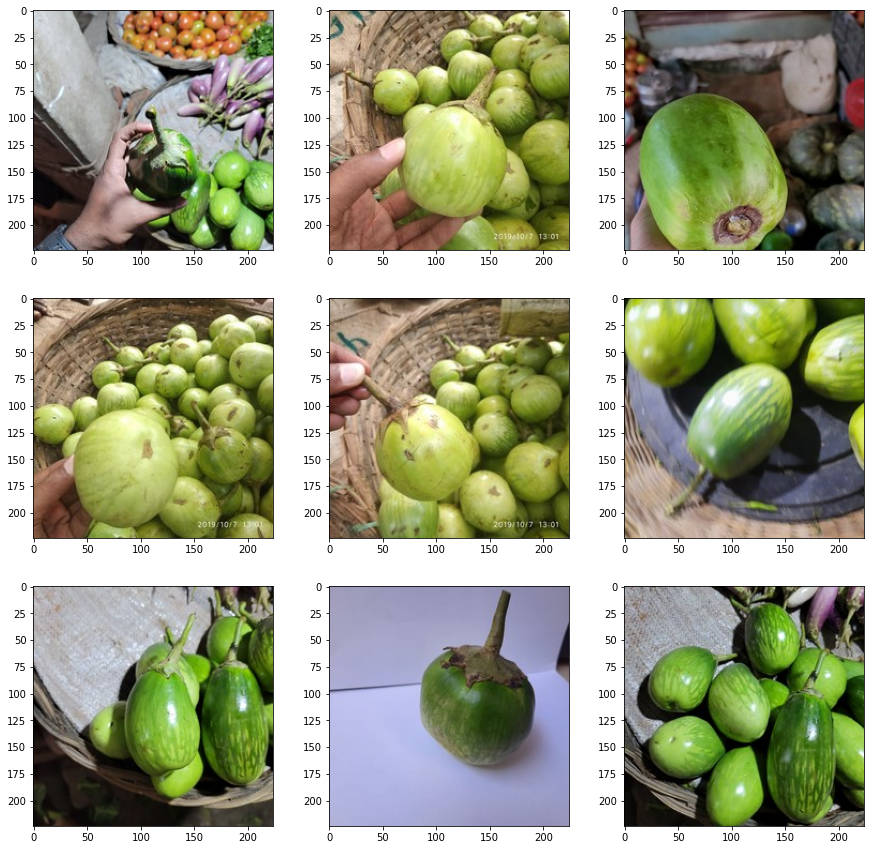

In [8]:
input_tensor = transform(PIL_img)
input_tensor = input_tensor.view(1, *input_tensor.shape)

# Search index for neighbor embeddings
with torch.no_grad():
  query_descriptors = pooling_output(input_tensor.to(DEVICE)).cpu().numpy()
  distance, indices = index.search(query_descriptors.reshape(1, 2048), 9)

fig, ax = plt.subplots(3, 3, figsize=(15,15))
for file_index, ax_i in zip(indices[0], np.array(ax).flatten()):
  ax_i.imshow(plt.imread(img_paths[file_index]))

plt.show()

In [ ]:
transform = transforms.Compose([
    transforms.Resize(size=[224, 224], interpolation=2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
])

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using Deivce:", DEVICE)
model = models.resnet50(pretrained=True)
model.to(DEVICE)

def pooling_output(x):
    global model
    for layer_name, layer in model._modules.items():
        x = layer(x)
        if layer_name == 'avgpool':
            break
    return x

input_tensor = transform(PIL_img)
input_tensor = input_tensor.view(1, *input_tensor.shape)

with torch.no_grad():
    query_descriptors = pooling_output(input_tensor.to(DEVICE)).cpu().numpy()

In [9]:
indices

array([[ 3271,  3332, 10536,  3734,  3089,  3903,  3963,  3863,  3403]])